# **Importing the Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

## Checking GPU compatibility

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

# **Loading Dataset**

In [3]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

## Classification labels from the dataset documentation

In [4]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

## Preprocessing

In [5]:
x_train,x_test = x_train/255.0,x_test/255.0

In [6]:
print("x train shape = {} ".format(x_train.shape))
print("y train shape = {} ".format(y_train.shape))

x train shape = (50000, 32, 32, 3) 
y train shape = (50000, 1) 


Text(0.5, 0, 'deer')

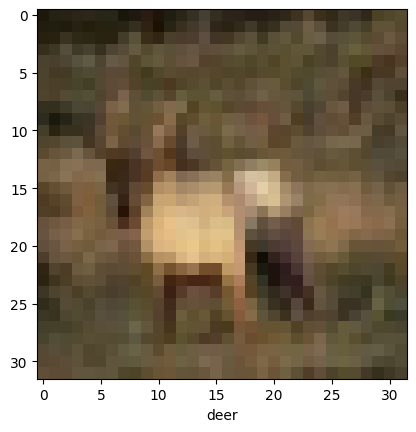

In [7]:
plt.imshow(x_train[3])
plt.xlabel(classes[y_train[3][0]])

In [8]:
x_train /= np.std(x_train, axis = 0)
x_test /= np.std(x_test, axis = 0)

# **Defining our CNN Model using Keras**

In [9]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape =  (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation = 'relu', input_shape = (32,32,2)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation = 'relu', input_shape = (32,32,2)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

## **Model Summary**

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

## **Call back function (Val_Loss)**

**regularization technique which stops training if  updation in parameters(val_loss here) doesnt make any difference in validation set**

In [11]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss')

# **Compilation of the Model**

In [12]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

# **Model Fitting**

In [13]:
history=model.fit(x_train,y_train,epochs=20,batch_size = 64,validation_data=(x_test,y_test),callbacks=[early_stop],use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 9s 7ms/step - loss: 1.6625 - accuracy: 0.3928 - val_loss: 1.4265 - val_accuracy: 0.4816
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 1.3119 - accuracy: 0.5310 - val_loss: 1.2291 - val_accuracy: 0.5557
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 1.1637 - accuracy: 0.5898 - val_loss: 1.1649 - val_accuracy: 0.5983
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 1.0614 - accuracy: 0.6271 - val_loss: 1.0261 - val_accuracy: 0.6492
Epoch 5/20
782/782 [==============================] - 7s 8ms/step - loss: 0.9829 - accuracy: 0.6549 - val_loss: 1.0233 - val_accuracy: 0.6423
Epoch 6/20
782/782 [==============================] - 5s 7ms/step - loss: 0.9244 - accuracy: 0.6789 - val_loss: 0.9480 - val_accuracy: 0.6770
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.8762 - accuracy: 0.6955 - val_loss: 0.9237 - val_accuracy: 0.6820
Epoch 

# Val_Accuracy vs Accuracy Plotting

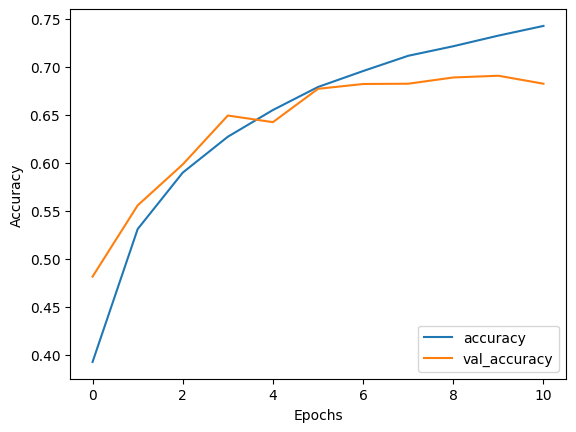

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Val_Loss Vs Loss Plotting

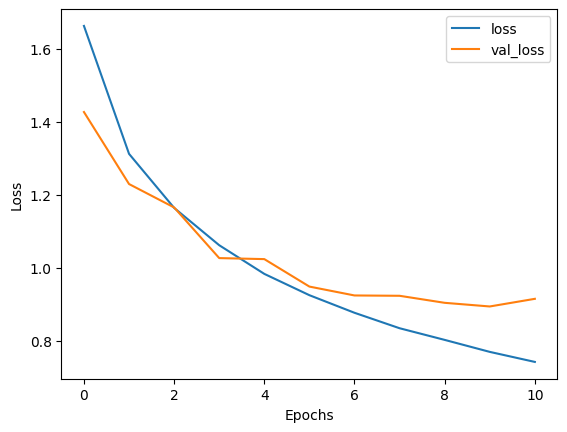

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(loc='upper right')

# **Model Prediction**

In [16]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [74]:
from sklearn.metrics import accuracy_score
print(f"Accuracy of the model is {accuracy_score(y_test,y_pred)*100} %")

Accuracy of the model is 68.23 %


In [18]:
y_pred = [np.argmax(y) for y in y_pred]

Text(0.5, 0, 'ship')

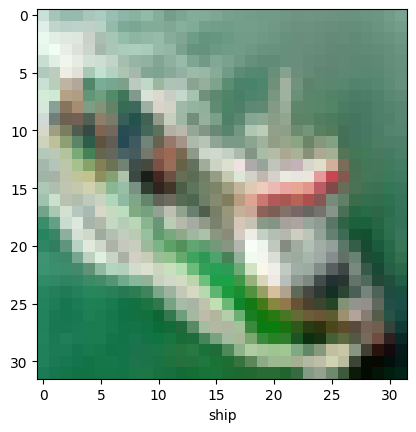

In [17]:
plt.imshow(x_test[15])
plt.xlabel(classes[y_test[15][0]])

In [66]:
print(f"Predicted Class by the Model for the above image  is  {classes[y_pred[15]]}")

Predicted Class by the Model for the above image  is  ship


Text(0.5, 0, 'frog')

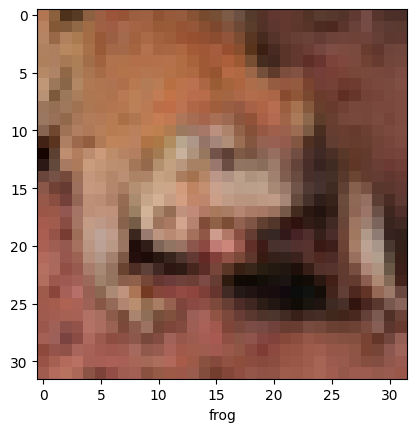

In [27]:
plt.imshow(x_test[5])
plt.xlabel(classes[y_test[5][0]])

In [67]:
print(f"Predicted Class by the Model for the above image  is {classes[y_pred[5]]}")

Predicted Class by the Model for the above image  is frog


Text(0.5, 0, 'deer')

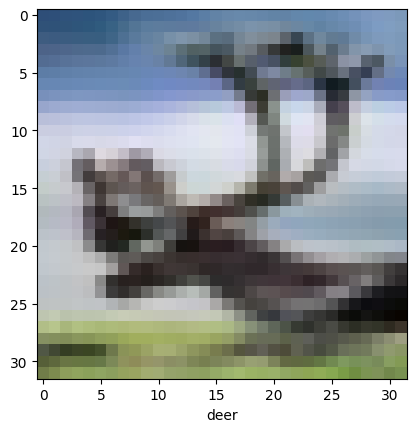

In [22]:
plt.imshow(x_test[40])
plt.xlabel(classes[y_test[40][0]])

In [68]:
print(f"Predicted Class by the Model for the above image  is {classes[y_pred[40]]}")

Predicted Class by the Model for the above image  is airplane


Text(0.5, 0, 'horse')

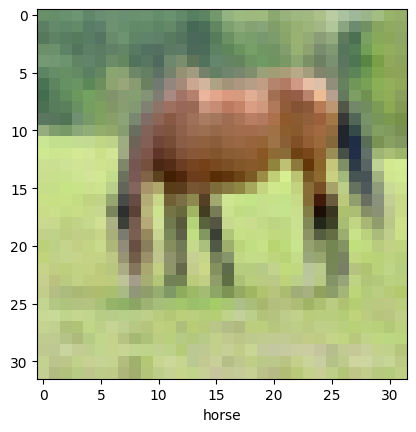

In [24]:
plt.imshow(x_test[60])
plt.xlabel(classes[y_test[60][0]])

In [69]:
print(f"Predicted Class by the Model for the above image  is {classes[y_pred[60]]}")

Predicted Class by the Model for the above image  is horse
